In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
inputs_pre = [[0, 0], [0, 1], [1, 0], [1, 1]]
outputs = [0, 1, 1, 1]

Ici, nos inputs correspondent à un couple de bits (0 ou 1) et les outputs représentent l'application de la fonction binaire OR sur chaque couple de notre input

Sachant que chaque couple de bits de notre input comporte deux éléments que l'on appellera A et B, on peut en déduire que notre perceptron aura 2 entrées et donc deux poids à déterminer.

Le perceptron dépend également d'une fonction d'activation qui est, dans notre cas, la fonction Heaviside dont la représentation est la suivante

In [3]:
def activation(x):
   return 0 if x < 0 else 1

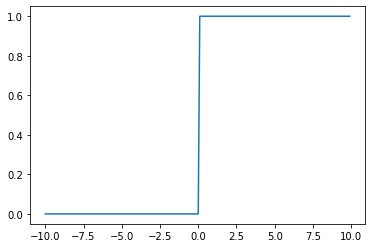

In [4]:
inputs_activation = [x for x in np.arange(-10, 10, 0.1)]
outputs_activation = list(map(activation, inputs_activation))

plt.plot(inputs_activation, outputs_activation)

In [5]:
nb_features = len(inputs_pre[0])
bias = 0
training_factor = 0.01
nb_iter = 2_000
weights = [0 for x in range(nb_features)]

Nous allons maintenant devoir modifier notre liste de poids et nos inputs pour prendre en compte le biais de la fonction d'activation.
Notre fonction d'activation peut être représentée de la manière suivante : 
Si la somme du produit des poids avec les input est supérieure au biais, alors notre neurone s'active. On peut donc le matérialiser de la façon suivante :
`x1*w1 + x2*w2 >= biais` ce qui est équivalent à `1*(-biais) + x1*w1 + x2*w2 >= 0`. On se retrouve donc avec un input ainsi qu'un poids en plus.

In [6]:
inputs = [[1, a, b] for a, b in inputs_pre]
weights.insert(0, -bias)

In [7]:
print(inputs)
print(weights)

[[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]
[0, 0, 0]


Essayons maintenant de voir ce que notre neurone retourne lorsque nous lui appliquons l'input [0, 1] sans l'avoir entraîné, c'est-à-dire, sans avoir modifié nos poids de manière à ce que notre neurone soit entraîné à reconnaître la logique.

In [8]:
def guess (input, weights):
   input.insert(0, 1)
   sum_val = np.sum(np.multiply(input, weights))
   return activation(sum_val)

In [9]:
print(guess([0, 1], weights))

1


Notre neurone retourne la valeur `1` ce qui correspond à l'output de la fonction OR sur les bits 0 et 1. Néanmoins, cela ne veut pas dire que notre neurone est entraïné, car si l'on teste notre neurone avec l'input 0 et 0, le neurone est supposé retourner 0. Voyons ce qu'il nous retourne.

In [10]:
print(guess([0, 0], weights))

1


On voit que la valeur retournée cette fois-ci ne correspond pas à la valeur attendue. Nous allons donc devoir entaïner notre neurone pour que les valeurs des poids permettent de faire correspondre nos inputs et nos outputs.

Pour ce faire, nous allons devoir appliquer la formule suivante sur les valeurs de nos poids : `weight_new = weight_old + training_factor * (output_attendu - output_obtenu) * input`

In [11]:
for k in range(nb_iter):
   output_list = []
   for i in range(len(inputs)):
      sum_val = np.sum(np.multiply(inputs[i], weights))
      output_tmp = activation(sum_val)

      for j in range(nb_features + 1):
         weights[j] += (
            training_factor
            * (outputs[i] - output_tmp)
            * inputs[i][j]
         )

In [12]:
print(weights)

[-0.01, 0.01, 0.01]


In [14]:
print(f"0 OR 0 -> {guess([0, 0], weights)}")
print(f"0 OR 1 -> {guess([0, 1], weights)}")
print(f"1 OR 0 -> {guess([1, 0], weights)}")
print(f"1 OR 1 -> {guess([1, 1], weights)}")

0 OR 0 -> 0
0 OR 1 -> 1
1 OR 0 -> 1
1 OR 1 -> 1


Après l'entraînement de notre neurone, on remarque bien que les résultats retournés correspondent à nos attentes.